D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.

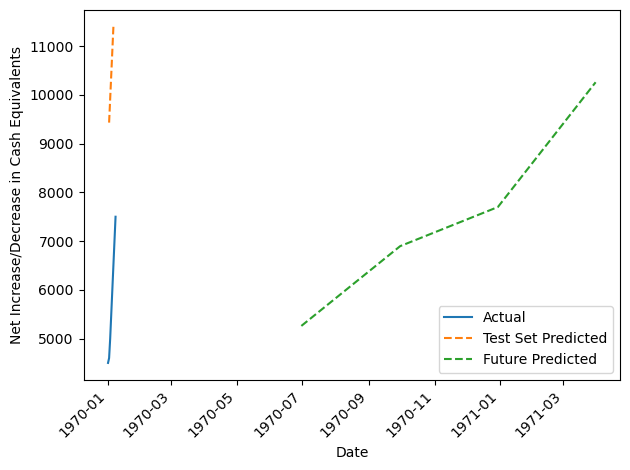

In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('cash_flow_data_quarterly.xlsx')

# Select relevant features
features = ['GDP_Growth_Rate', 'Inflation_Rate']
target = 'Net_Increase_Decrease_Cash_Equivalents'

# Extract features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Time series analysis using SARIMAX on the training set
model_sarimax = SARIMAX(y_train, order=(1, 0, 1), seasonal_order=(1, 1, 1, 4))
result_sarimax = model_sarimax.fit()

# Linear regression for exogenous variables on the training set
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

# Make predictions for the test set
sarimax_predictions_test = result_sarimax.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)
regression_predictions_test = model_regression.predict(X_test)

# Combine predictions for the test set
final_predictions_test = sarimax_predictions_test + regression_predictions_test

# Make predictions for the next 4 quarters
last_quarter = df.index[-1]
future_quarters = 4
future_index = pd.date_range(start=last_quarter, periods=future_quarters, freq='Q') + pd.DateOffset(months=3)
future_X = pd.DataFrame(index=future_index, columns=features)

# Handle missing values in the future_X dataframe
future_X.fillna(0, inplace=True)  # Replace NaN with 0 for simplicity, you may want to use a more sophisticated imputation strategy

sarimax_predictions_future = result_sarimax.get_forecast(steps=future_quarters).predicted_mean
regression_predictions_future = model_regression.predict(future_X)

# Combine predictions for the future quarters
final_predictions_future = sarimax_predictions_future + regression_predictions_future

# Plotting
plt.plot(df.index, y, label='Actual')
plt.plot(y_test.index, final_predictions_test, label='Test Set Predicted', linestyle='--')
plt.plot(future_index, final_predictions_future, label='Future Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Net Increase/Decrease in Cash Equivalents')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
